## 786

In [67]:
# importing neccesary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Property_ID -------------- Represents a unique identification of a property

Property_Type -------------- Represents the type of the property( Apartment, Bungalow, etc)

Property_Area -----------Represents the area of the property in square feets

Number_of_Windows ---------------Represents the number of windows available in the property

Number_of_Doors ----------Represents the number of doors available in the property

Furnishing -----------Represents the furnishing type ( Fully Furnished, Semi Furnished,
or Unfurnished )
Frequency_of_Powercuts --------------Represents the average number of power cuts per week

Power_Backup -------------------Represents the availability of power backup

Water_Supply -----------------Represents the availability of water supply ( All time, Once in a day
- Morning, Once in a day - Evening, and Once in two days)

Traffic_Density_Score -------Represents the density of traffic on a scale of 1 to 10

Crime_Rate ------------Represents the crime rate in the neighborhood ( Well below
average, Slightly below average, Slightly above average, and Well
above average )

Dust_and_Noise ----------Represents the quantity of dust and noise in the neighborhood (
High, Medium, Low )

Air_Quality_Index --------------Represents the Air Quality Index of the neighborhood

Neighborhood_Review --------Represents the average ratings given to the neighborhood by the
people

Habitability_score ----------Represents the habitability score of the property

In [68]:
# loading dataset
df = pd.read_csv("C:/Users/NOOMAN KHAN/Downloads/House Data.csv")
df.head(3).transpose()

,0,1,2
Property_ID,0x21e3,0x68d4,0x7d81
Property_Type,Apartment,Apartment,Apartment
Property_Area,106,733,737
Number_of_Windows,NaN,2.0,4.0
Number_of_Doors,1,2,2
Furnishing,Semi_Furnished,Unfurnished,Fully Furnished
Frequency_of_Powercuts,0.0,1.0,0.0
Power_Backup,No,No,No
Water_Supply,Once in a day - Morning,Once in a day - Evening,Once in a day - Morning
Traffic_Density_Score,5.89,4.37,7.45


In [69]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_ID             39499 non-null  object 
 1   Property_Type           39499 non-null  object 
 2   Property_Area           39499 non-null  int64  
 3   Number_of_Windows       37845 non-null  float64
 4   Number_of_Doors         39499 non-null  int64  
 5   Furnishing              38457 non-null  object 
 6   Frequency_of_Powercuts  38116 non-null  float64
 7   Power_Backup            39499 non-null  object 
 8   Water_Supply            39499 non-null  object 
 9   Traffic_Density_Score   39499 non-null  float64
 10  Crime_Rate              38712 non-null  object 
 11  Dust_and_Noise          38280 non-null  object 
 12  Air_Quality_Index       39499 non-null  float64
 13  Neighborhood_Review     39499 non-null  float64
 14  Habitability_score      39499 non-null

In [70]:
# checking null
df.isnull().sum()

Property_ID                  0
Property_Type                0
Property_Area                0
Number_of_Windows         1654
Number_of_Doors              0
Furnishing                1042
Frequency_of_Powercuts    1383
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                 787
Dust_and_Noise            1219
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
dtype: int64

In [71]:
# descriptive statistics
df.describe()

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score
count,39499.000000,37845.000000,39499.000000,38116.000000,39499.000000,39499.000000,39499.000000,39499.000000
mean,1391.715638,3.923768,2.331375,0.484678,6.354772,121.352566,3.735945,73.482297
std,1953.287544,2.690992,1.179964,0.752207,1.219681,62.384669,0.796843,14.118753
min,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.280000
25%,494.000000,2.000000,1.000000,0.000000,5.600000,95.000000,3.220000,69.660000
50%,932.000000,4.000000,2.000000,0.000000,6.470000,113.000000,3.850000,75.760000
75%,1770.000000,5.000000,3.000000,1.000000,7.220000,140.000000,4.260000,82.260000
max,28064.000000,15.000000,6.000000,3.000000,9.910000,1044.000000,5.000000,100.000000


In [72]:
# Property_ID not necceasary lets remove it
df1 = df.copy()

In [73]:
df1 = df.drop("Property_ID" , axis = 1)

In [8]:
# lets fill null with most frequent one in categorical varable 

In [74]:
df1["Furnishing"] = df1["Furnishing"].fillna(df1["Furnishing"].mode()[0])
df1["Crime_Rate"] = df1["Crime_Rate"].fillna(df1["Crime_Rate"].mode()[0])
df1["Dust_and_Noise"] = df1["Dust_and_Noise"].fillna(df1["Dust_and_Noise"].mode()[0])
df1["Frequency_of_Powercuts"] = df1["Frequency_of_Powercuts"].fillna(df1["Frequency_of_Powercuts"].mode()[0])


In [75]:
df1.isnull().sum()

Property_Type                0
Property_Area                0
Number_of_Windows         1654
Number_of_Doors              0
Furnishing                   0
Frequency_of_Powercuts       0
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                   0
Dust_and_Noise               0
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
dtype: int64

In [11]:
# lets tackel null of countinous variable 

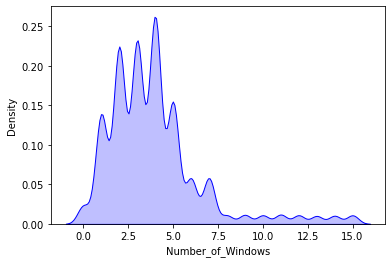

In [76]:

sns.kdeplot(df1["Number_of_Windows"] , fill = True , color = "blue")
plt.show()

 


In [77]:
#  first check with mean
df1["mean_Number_of_Windows"] =  df1["Number_of_Windows"].fillna(df1["Number_of_Windows"].mean())

In [78]:
print(df1["mean_Number_of_Windows"].std())
df1["Number_of_Windows"].std()

2.6340465432553857


2.6909924572358306

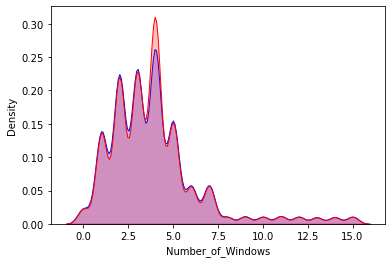

In [79]:
sns.kdeplot(df1["Number_of_Windows"] , fill = True , color = "blue")
sns.kdeplot(df1["mean_Number_of_Windows"] , fill = True , color = "red")

plt.show()
 

In [80]:
df1["median_Number_of_Windows"] =  df1["Number_of_Windows"].fillna(df1["Number_of_Windows"].median())

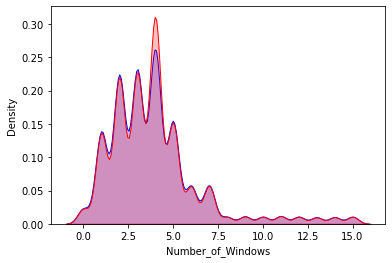

In [81]:
sns.kdeplot(df1["Number_of_Windows"] , fill = True , color = "blue")
sns.kdeplot(df1["median_Number_of_Windows"] , fill = True , color = "red")

plt.show()
 

In [18]:
# the effect of median and mean are same we can use anything

In [82]:
df1 = df1.drop(["mean_Number_of_Windows","median_Number_of_Windows"] , axis = 1)

In [83]:
df1.columns

Index(['Property_Type', 'Property_Area', 'Number_of_Windows',
       'Number_of_Doors', 'Furnishing', 'Frequency_of_Powercuts',
       'Power_Backup', 'Water_Supply', 'Traffic_Density_Score', 'Crime_Rate',
       'Dust_and_Noise', 'Air_Quality_Index', 'Neighborhood_Review',
       'Habitability_score'],
      dtype='object')

In [84]:
df1["Number_of_Windows"] = df1["Number_of_Windows"].fillna(df1["Number_of_Windows"].mean())

In [85]:
df1.isnull().sum()

Property_Type             0
Property_Area             0
Number_of_Windows         0
Number_of_Doors           0
Furnishing                0
Frequency_of_Powercuts    0
Power_Backup              0
Water_Supply              0
Traffic_Density_Score     0
Crime_Rate                0
Dust_and_Noise            0
Air_Quality_Index         0
Neighborhood_Review       0
Habitability_score        0
dtype: int64

In [86]:
df2 = df1.copy()

In [87]:
# lets see effect of categorical variable on Habitability_score
df_cat = df1[["Property_Type" ,"Furnishing" , "Power_Backup" , "Water_Supply" , "Crime_Rate" 
              , "Dust_and_Noise"]]
 

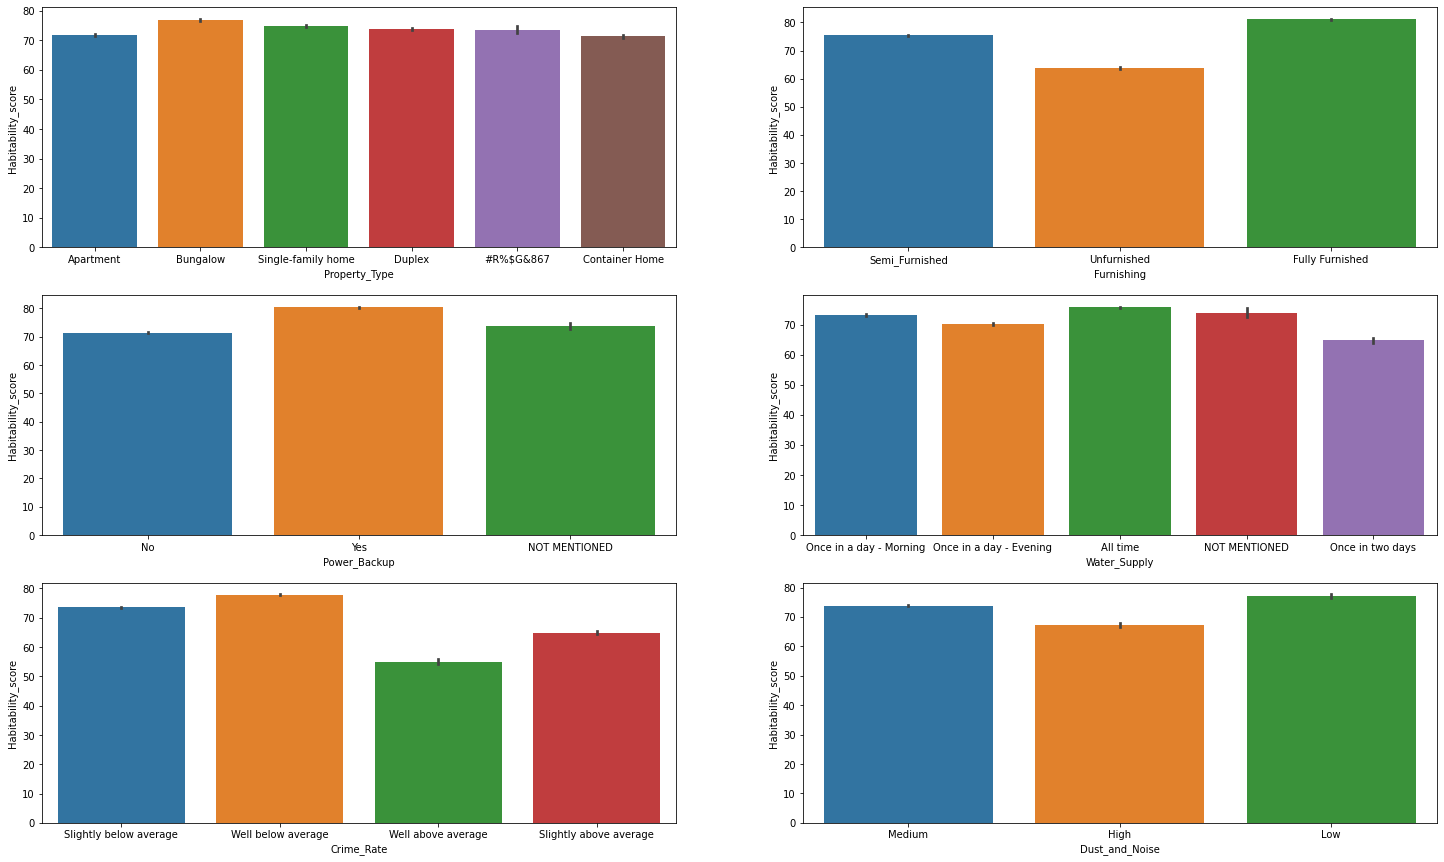

In [88]:
fig , ax = plt.subplots(3 , 2 ,figsize = (25,15))
index = 0

for i in range(3):
    for j in range(2):
        sns.barplot(x = df1[df_cat.columns[index]] , y = df1["Habitability_score"] , ax = ax[i][j])
        index+=1

In [26]:
# lets see effect of coutinous variable on Habitability_score

In [89]:
df_cont = df1.drop(list(df_cat.columns) , axis = 1)
df_cont

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,106,3.923768,1,0.0,5.89,90.0,3.86,71.98
1,733,2.000000,2,1.0,4.37,96.0,3.55,71.20
2,737,4.000000,2,0.0,7.45,121.0,3.81,71.39
3,900,3.000000,2,2.0,6.16,100.0,1.34,31.46
4,2238,14.000000,6,0.0,5.46,116.0,4.77,93.70
...,...,...,...,...,...,...,...,...
39494,1120,3.000000,2,0.0,5.55,80.0,3.56,73.43
39495,445,1.000000,3,1.0,5.70,86.0,2.93,79.91
39496,3780,6.000000,6,0.0,6.84,137.0,3.80,81.44
39497,1266,3.000000,1,0.0,4.60,88.0,3.25,71.33


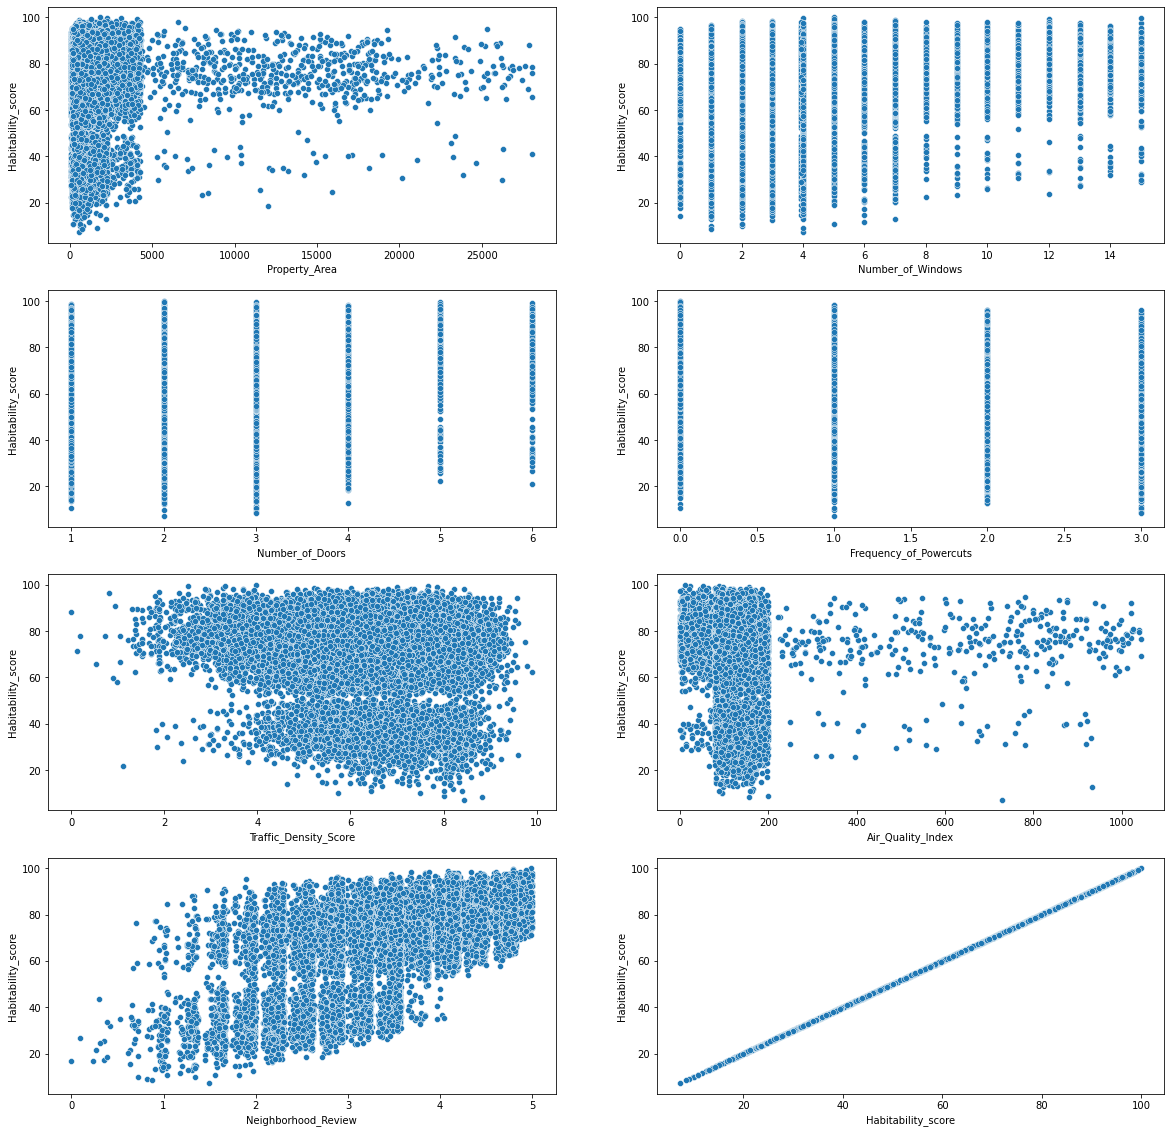

In [90]:
fig , ax = plt.subplots(4 , 2 ,figsize = (20,20))
index = 0

for i in range(4):
    for j in range(2):
        sns.scatterplot(x = df1[df_cont.columns[index]] , y = df1["Habitability_score"] , ax = ax[i][j])
        index+=1

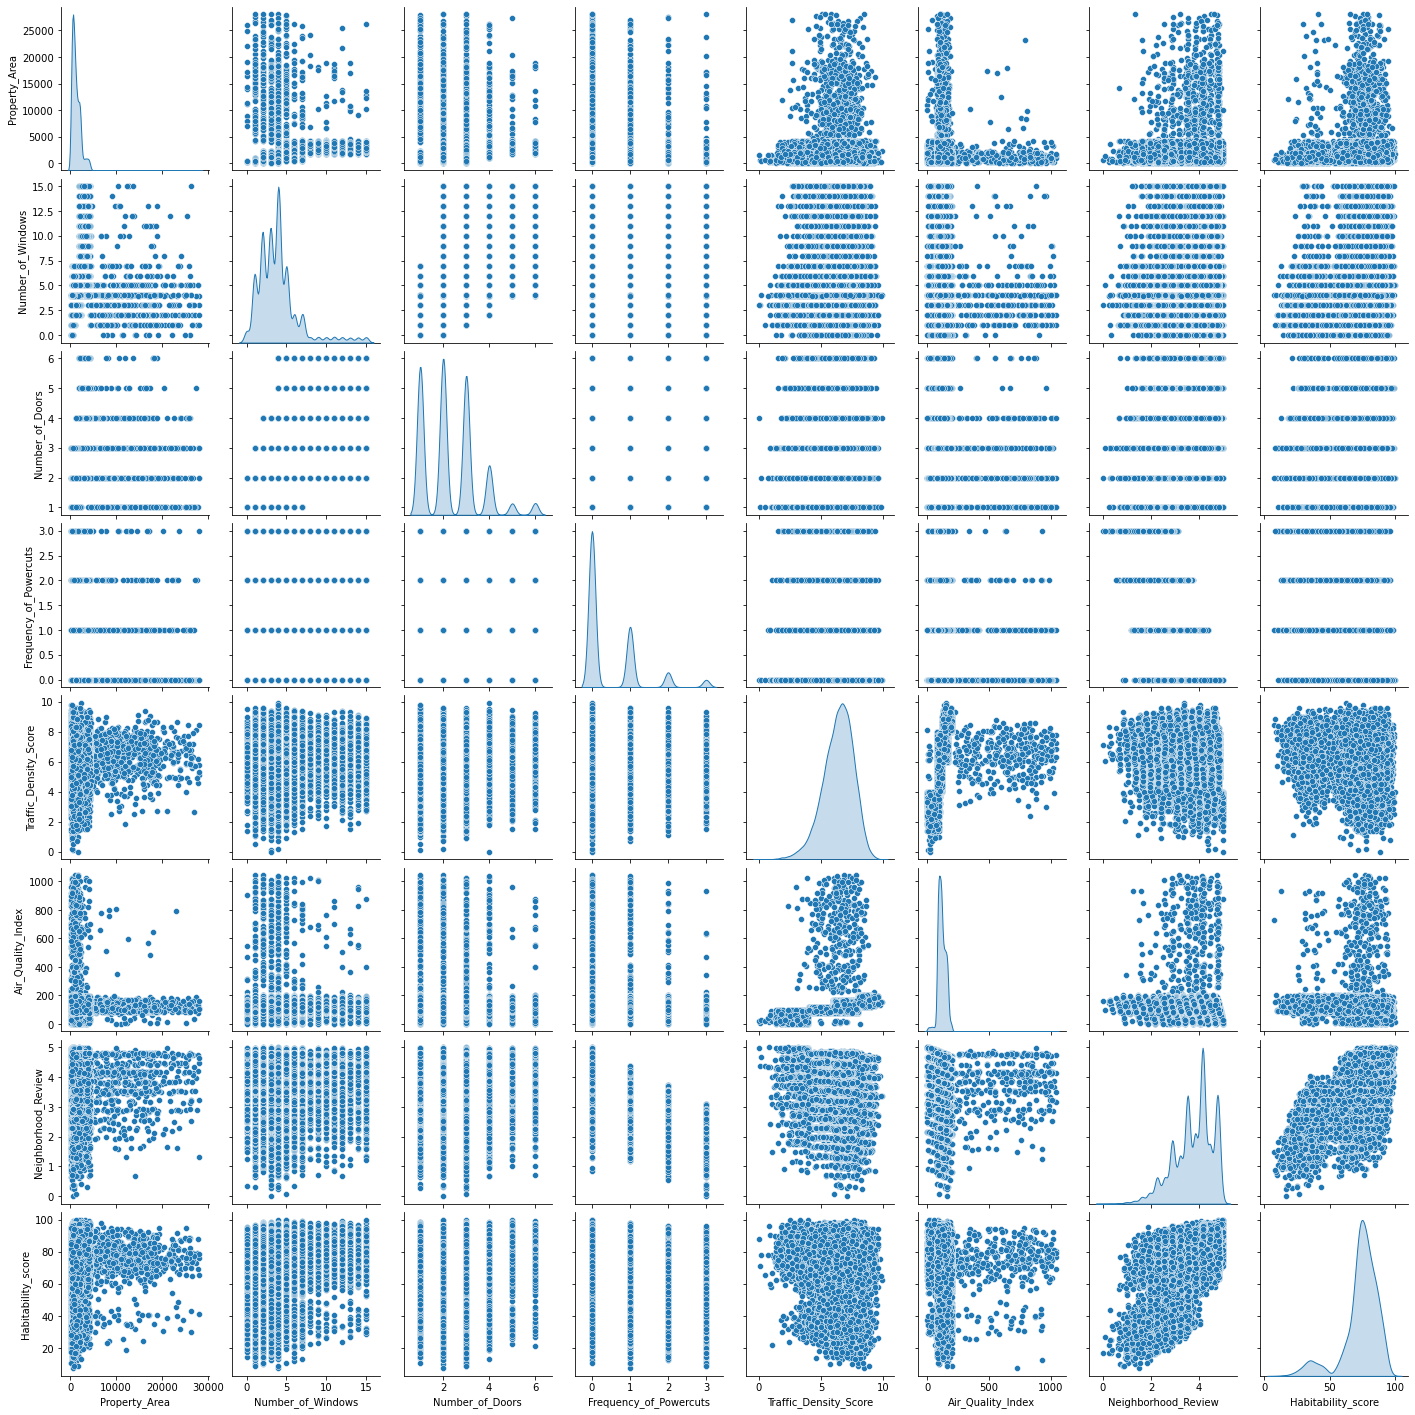

In [29]:
sns.pairplot(df1 , diag_kind = "kde")

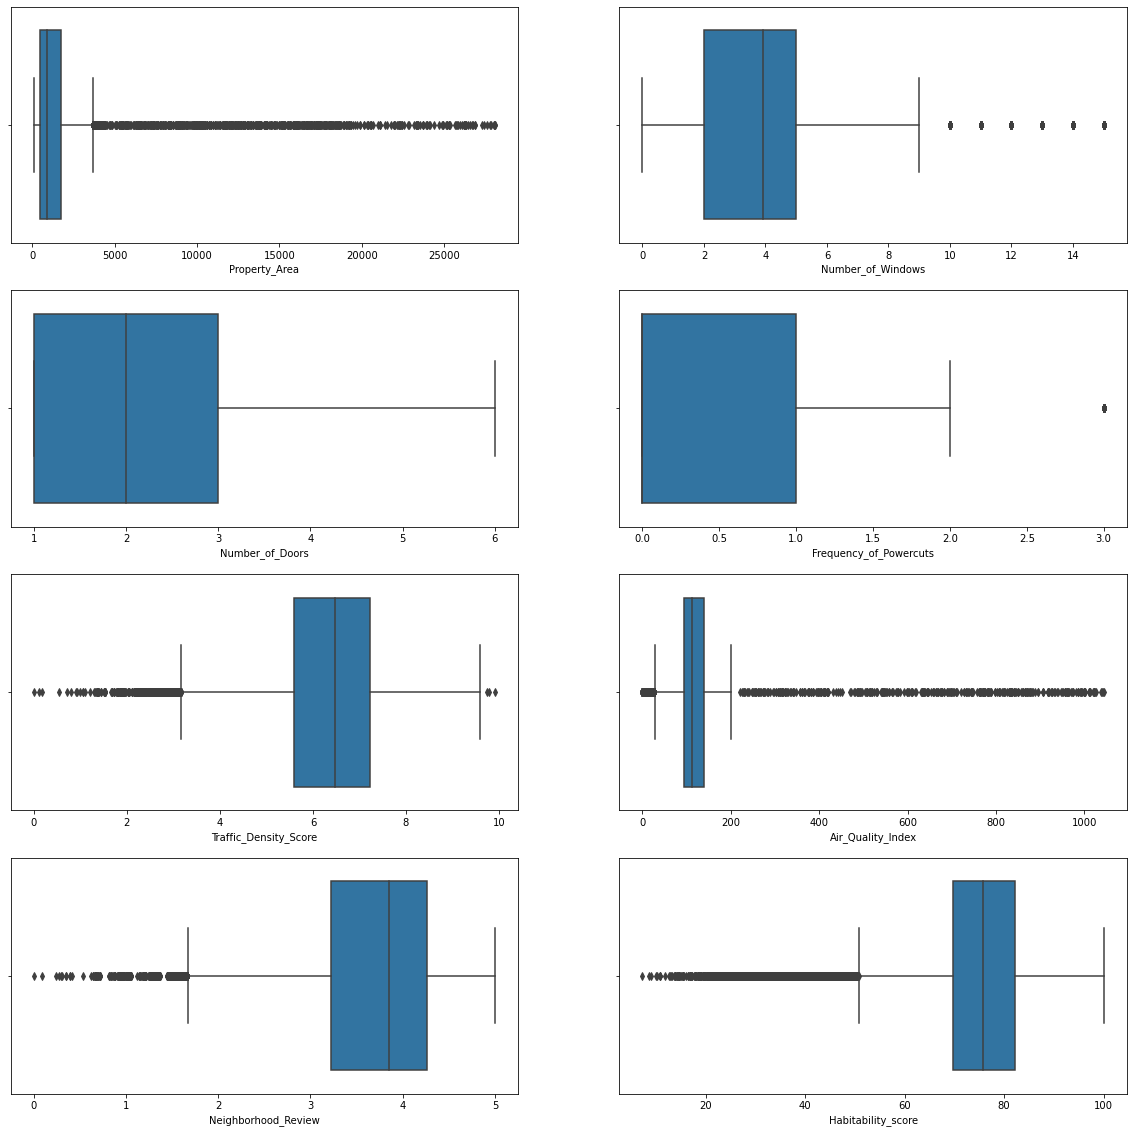

In [91]:
# outliers analysis
fig , ax = plt.subplots(4 , 2 ,figsize = (20,20))
index = 0

for i in range(4):
    for j in range(2):
        sns.boxplot(x = df1[df_cont.columns[index]]  , ax = ax[i][j])
        index+=1

In [92]:
def outlisers_remove(df , df_cont):
    for i in df_cont:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        IQR = q3-q1
        LL = q1-1.5*IQR 
        UL = q3+1.5*IQR
        df = df[(df[i]>=LL) & (df[i]<=UL)]
    return df

In [93]:
df1 = outlisers_remove(df1 , df_cont)
df1

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,Apartment,106,3.923768,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,Apartment,733,2.000000,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,Apartment,737,4.000000,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
5,Single-family home,1185,3.000000,3,Unfurnished,0.0,No,Once in a day - Morning,5.69,Well below average,Medium,91.0,4.49,82.94
6,Single-family home,1779,3.000000,3,Semi_Furnished,0.0,No,Once in a day - Evening,7.43,Well below average,Medium,100.0,2.90,74.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39493,Apartment,276,1.000000,3,Semi_Furnished,0.0,No,NOT MENTIONED,4.47,Well below average,Medium,81.0,4.20,73.61
39494,Single-family home,1120,3.000000,2,Semi_Furnished,0.0,No,All time,5.55,Slightly above average,Medium,80.0,3.56,73.43
39495,Apartment,445,1.000000,3,Fully Furnished,1.0,No,All time,5.70,Slightly above average,Medium,86.0,2.93,79.91
39497,Single-family home,1266,3.000000,1,Semi_Furnished,0.0,No,Once in a day - Morning,4.60,Slightly above average,Medium,88.0,3.25,71.33


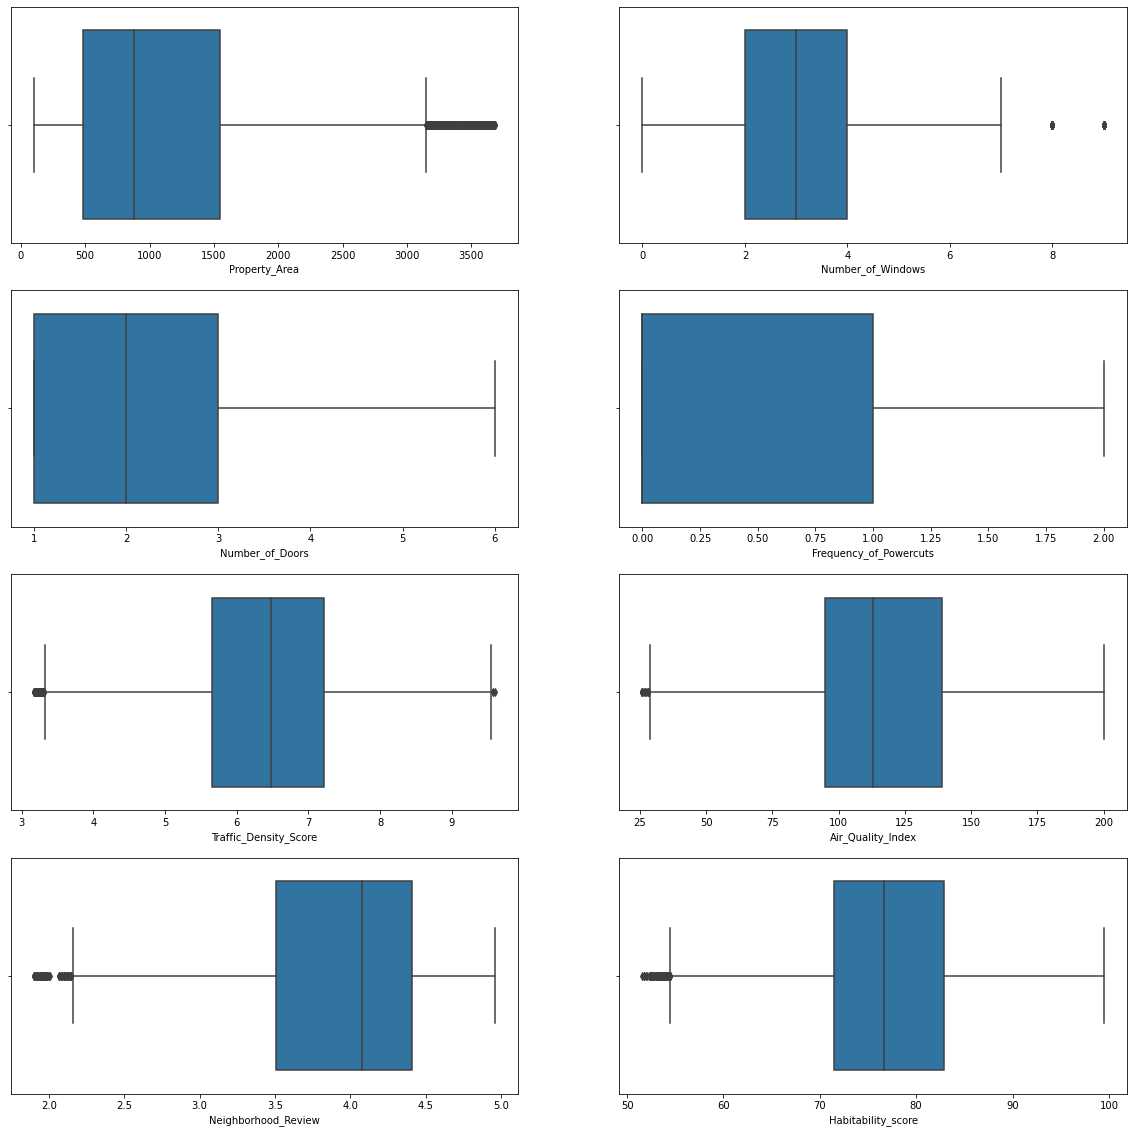

In [94]:
fig , ax = plt.subplots(4 , 2 ,figsize = (20,20))
index = 0

for i in range(4):
    for j in range(2):
        sns.boxplot(x = df1[df_cont.columns[index]]  , ax = ax[i][j])
        index+=1

<AxesSubplot:>

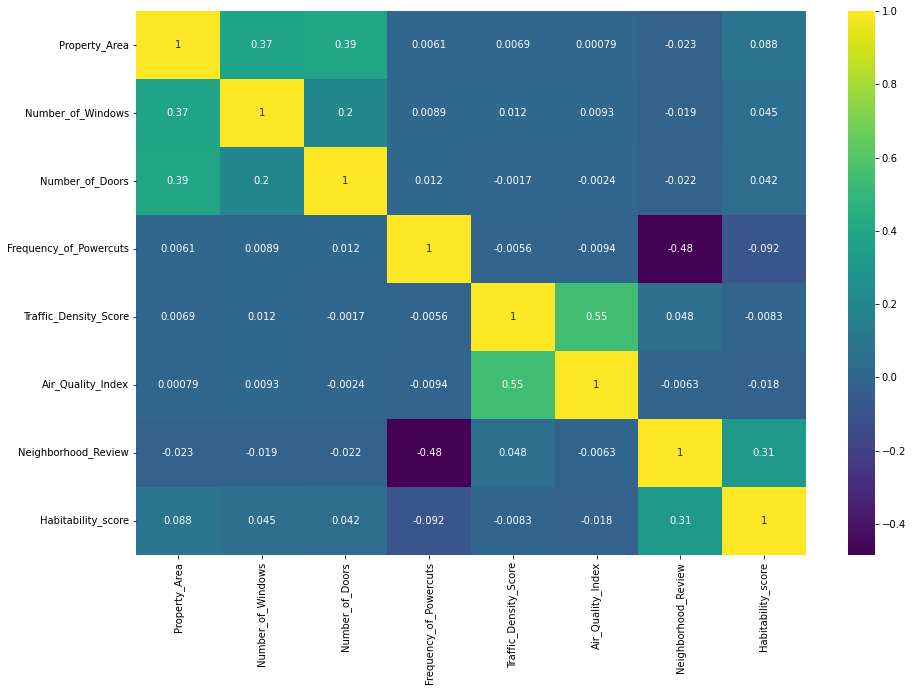

In [95]:
plt.figure(figsize = (15,10))
sns.heatmap(df1.corr(),cmap = "viridis" , annot = True)

In [96]:
df1.isnull().sum()

Property_Type             0
Property_Area             0
Number_of_Windows         0
Number_of_Doors           0
Furnishing                0
Frequency_of_Powercuts    0
Power_Backup              0
Water_Supply              0
Traffic_Density_Score     0
Crime_Rate                0
Dust_and_Noise            0
Air_Quality_Index         0
Neighborhood_Review       0
Habitability_score        0
dtype: int64

lets encode the categorical feature

In [97]:
for i in df_cat.columns:
    print(df1[i].value_counts())

Apartment             12127
Single-family home     9967
Duplex                 4923
Container Home         2376
Bungalow               1478
#R%$G&867               407
Name: Property_Type, dtype: int64
Semi_Furnished     17806
Unfurnished         6862
Fully Furnished     6610
Name: Furnishing, dtype: int64
No               22998
Yes               7625
NOT MENTIONED      655
Name: Power_Backup, dtype: int64
All time                   16028
Once in a day - Morning     7883
Once in a day - Evening     5855
Once in two days            1240
NOT MENTIONED                272
Name: Water_Supply, dtype: int64
Well below average        17272
Slightly below average     9338
Slightly above average     3619
Well above average         1049
Name: Crime_Rate, dtype: int64
Medium    27889
High       2259
Low        1130
Name: Dust_and_Noise, dtype: int64


In [98]:
df1

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,Apartment,106,3.923768,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,Apartment,733,2.000000,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,Apartment,737,4.000000,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
5,Single-family home,1185,3.000000,3,Unfurnished,0.0,No,Once in a day - Morning,5.69,Well below average,Medium,91.0,4.49,82.94
6,Single-family home,1779,3.000000,3,Semi_Furnished,0.0,No,Once in a day - Evening,7.43,Well below average,Medium,100.0,2.90,74.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39493,Apartment,276,1.000000,3,Semi_Furnished,0.0,No,NOT MENTIONED,4.47,Well below average,Medium,81.0,4.20,73.61
39494,Single-family home,1120,3.000000,2,Semi_Furnished,0.0,No,All time,5.55,Slightly above average,Medium,80.0,3.56,73.43
39495,Apartment,445,1.000000,3,Fully Furnished,1.0,No,All time,5.70,Slightly above average,Medium,86.0,2.93,79.91
39497,Single-family home,1266,3.000000,1,Semi_Furnished,0.0,No,Once in a day - Morning,4.60,Slightly above average,Medium,88.0,3.25,71.33


less subcategory we can go easily one hot encoding

In [99]:
for i in df_cat:
    df1 = pd.get_dummies(data = df1 , columns=[i] ,drop_first = True)

In [100]:
df1

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score,Property_Type_Apartment,Property_Type_Bungalow,...,Power_Backup_Yes,Water_Supply_NOT MENTIONED,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days,Crime_Rate_Slightly below average,Crime_Rate_Well above average,Crime_Rate_Well below average,Dust_and_Noise_Low,Dust_and_Noise_Medium
0,106,3.923768,1,0.0,5.89,90.0,3.86,71.98,1,0,...,0,0,0,1,0,1,0,0,0,1
1,733,2.000000,2,1.0,4.37,96.0,3.55,71.20,1,0,...,0,0,1,0,0,0,0,1,0,1
2,737,4.000000,2,0.0,7.45,121.0,3.81,71.39,1,0,...,0,0,0,1,0,1,0,0,0,1
5,1185,3.000000,3,0.0,5.69,91.0,4.49,82.94,0,0,...,0,0,0,1,0,0,0,1,0,1
6,1779,3.000000,3,0.0,7.43,100.0,2.90,74.88,0,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39493,276,1.000000,3,0.0,4.47,81.0,4.20,73.61,1,0,...,0,1,0,0,0,0,0,1,0,1
39494,1120,3.000000,2,0.0,5.55,80.0,3.56,73.43,0,0,...,0,0,0,0,0,0,0,0,0,1
39495,445,1.000000,3,1.0,5.70,86.0,2.93,79.91,1,0,...,0,0,0,0,0,0,0,0,0,1
39497,1266,3.000000,1,0.0,4.60,88.0,3.25,71.33,0,0,...,0,0,0,1,0,0,0,0,0,1


All set know ready 

Model selection

In [101]:
X = df1.drop("Habitability_score"  , axis = 1).values
X

array([[1.060000e+02, 3.923768e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [7.330000e+02, 2.000000e+00, 2.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 1.000000e+00],
       [7.370000e+02, 4.000000e+00, 2.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       ...,
       [4.450000e+02, 1.000000e+00, 3.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [1.266000e+03, 3.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [1.229000e+03, 2.000000e+00, 4.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [102]:
Y = df1[["Habitability_score"]].values
Y

array([[71.98],
       [71.2 ],
       [71.39],
       ...,
       [79.91],
       [71.33],
       [83.25]])

In [103]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2, random_state = 42)

In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [105]:
from sklearn.linear_model import LinearRegression
le = LinearRegression()
le.fit(X_train , Y_train)

LinearRegression()

In [106]:
le.intercept_

array([76.86604908])

In [107]:
le.coef_

array([[ 0.80331947,  0.07559204,  0.17107283,  0.4918038 , -0.07005984,
         0.07528927,  3.06668156, -0.08138025, -0.09031554, -0.13849607,
         0.14684301, -0.01312155, -2.1410552 , -4.43728766, -0.54920691,
         2.09165354,  0.01775083, -0.13541512, -0.13707317, -0.22086839,
         0.52266812, -0.1769014 ,  0.71029743,  0.64758092,  0.51833593]])

In [108]:
y_pred = le.predict(X_test)

In [109]:
from sklearn import metrics
metrics.mean_squared_error(Y_test , y_pred)


43.44028588286157

In [110]:
np.sqrt(metrics.mean_squared_error(Y_test , y_pred))

6.590924508963941

In [111]:
metrics.r2_score(Y_test , y_pred)

0.37477546383284643

In [112]:
le.score(X_test , Y_test)

0.37477546383284643

Without removing outliers 

In [113]:
df2.isnull().sum()

Property_Type             0
Property_Area             0
Number_of_Windows         0
Number_of_Doors           0
Furnishing                0
Frequency_of_Powercuts    0
Power_Backup              0
Water_Supply              0
Traffic_Density_Score     0
Crime_Rate                0
Dust_and_Noise            0
Air_Quality_Index         0
Neighborhood_Review       0
Habitability_score        0
dtype: int64

In [114]:
df2_cat =  df2[["Property_Type" ,"Furnishing" , "Power_Backup" , "Water_Supply" , "Crime_Rate" 
              , "Dust_and_Noise"]]

In [115]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df2_cat:
    df2 = pd.get_dummies(data = df2 , columns = [i] ,drop_first=True )


In [116]:
df2

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score,Property_Type_Apartment,Property_Type_Bungalow,...,Power_Backup_Yes,Water_Supply_NOT MENTIONED,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days,Crime_Rate_Slightly below average,Crime_Rate_Well above average,Crime_Rate_Well below average,Dust_and_Noise_Low,Dust_and_Noise_Medium
0,106,3.923768,1,0.0,5.89,90.0,3.86,71.98,1,0,...,0,0,0,1,0,1,0,0,0,1
1,733,2.000000,2,1.0,4.37,96.0,3.55,71.20,1,0,...,0,0,1,0,0,0,0,1,0,1
2,737,4.000000,2,0.0,7.45,121.0,3.81,71.39,1,0,...,0,0,0,1,0,1,0,0,0,1
3,900,3.000000,2,2.0,6.16,100.0,1.34,31.46,1,0,...,1,0,0,1,0,0,1,0,0,1
4,2238,14.000000,6,0.0,5.46,116.0,4.77,93.70,0,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39494,1120,3.000000,2,0.0,5.55,80.0,3.56,73.43,0,0,...,0,0,0,0,0,0,0,0,0,1
39495,445,1.000000,3,1.0,5.70,86.0,2.93,79.91,1,0,...,0,0,0,0,0,0,0,0,0,1
39496,3780,6.000000,6,0.0,6.84,137.0,3.80,81.44,0,1,...,1,0,0,0,1,0,0,1,0,1
39497,1266,3.000000,1,0.0,4.60,88.0,3.25,71.33,0,0,...,0,0,0,1,0,0,0,0,0,1


In [117]:
X = df2.drop("Habitability_score"  , axis = 1).values
X

array([[1.060000e+02, 3.923768e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [7.330000e+02, 2.000000e+00, 2.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 1.000000e+00],
       [7.370000e+02, 4.000000e+00, 2.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       ...,
       [3.780000e+03, 6.000000e+00, 6.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 1.000000e+00],
       [1.266000e+03, 3.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [1.229000e+03, 2.000000e+00, 4.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [118]:
Y = df2[["Habitability_score"]].values
Y

array([[71.98],
       [71.2 ],
       [71.39],
       ...,
       [81.44],
       [71.33],
       [83.25]])

In [119]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2, random_state = 42)

In [120]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [121]:
from sklearn.linear_model import LinearRegression
le = LinearRegression()
le.fit(X_train , Y_train)

LinearRegression()

In [122]:
y_pred = le.predict(X_test)

In [123]:
metrics.r2_score(Y_test , y_pred)

0.5867196083432731